## Modeling 

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [152]:
df = pd.read_csv(r'C:\Users\tonym\Documents\Flatiron\phase_2\Project2\notebooks\Tony\cleanhousedata.csv')

In [153]:
df.head()

,price,view,sqft_living,sqft_lot,bedrooms,bathrooms
0,221900.0,NONE,1180,5650,2,2
1,538000.0,NONE,2570,7242,2,7
2,180000.0,NONE,770,10000,1,2
3,604000.0,NONE,1960,5000,3,10
4,510000.0,NONE,1680,8080,2,6


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20454 entries, 0 to 20453
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20454 non-null  float64
 1   view         20454 non-null  object 
 2   sqft_living  20454 non-null  int64  
 3   sqft_lot     20454 non-null  int64  
 4   bedrooms     20454 non-null  int64  
 5   bathrooms    20454 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 958.9+ KB


In [127]:
df.corr().abs()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.627416
bathrooms      0.460498
bedrooms       0.305282
sqft_lot       0.097379
Name: price, dtype: float64

### Function to Check Linearity 

In [156]:
def check_assumptions(X_train, y_train, train_preds, test_preds, y_test):
    """
    Creates graphs to assist in checking the assumptions of linearity.

    :param X_train: X values of model
    :param y_train: Values for 'price' in training dataset
    :param train_preds: Predicted values for 'price' in training dataset
    :param test_preds: Predicted values for 'price' in test dataset
    :param y_test: Values for 'price' in training dataset
    :return:
    """
    # Check Linearity
    train_df = pd.concat([X_train, y_train], axis=1)
    train_df.corr().price.sort_values(ascending=False)
    sns.pairplot(train_df)
    plt.show()

    # Check Multicollinearity
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(train_df.corr(), annot=True, )
    plt.show()

    # Check for residual normality
    train_residuals = y_train - train_preds
    sm.qqplot(train_residuals, line='r');
    test_residuals = y_test - test_preds
    sm.qqplot(test_residuals, line='r');

    # Checking heteroskedacity
    plt.scatter(train_preds, train_residuals, label='Train')
    plt.scatter(test_preds, test_residuals, label='Test')

    plt.axhline(y=0, color='red', label='0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()


In [171]:
def evaluate(y_train, train_preds, y_test, test_preds):
    """
    Evaluates the  R2, RMSE, and MAE scores of a model.

    :param y_tr: Values for 'price' in training dataset
    :param tr_preds: Predicted values for 'price' in training dataset
    :param y_te:  Values for 'price' in training dataset
    :param te_preds: Predicted values for 'price' in test dataset
    :return: None
    """
    print(f"Train R2: {r2_score(y_train, train_preds):.4f}")
    print(f"Test R2: {r2_score(y_test, test_preds):.4f}")
    print("****")
    print(f"Train RMSE: ${mean_squared_error(y_train, train_preds, squared=False):,.2f}")
    print(f"Test RMSE: ${mean_squared_error(y_test, test_preds, squared=False):,.2f}")
    print("****")
    print(f"Train MAE: ${mean_absolute_error(y_train, train_preds):,.2f}")
    print(f"Test MAE: ${mean_absolute_error(y_test, test_preds):,.2f}")

### Begin to split into train and test 

In [172]:
X = df.drop(columns=['price', 'sqft_lot', 'view'])
y = df['price']

In [173]:
# Train / Test Split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [174]:
# Make a train df so we can see X versus y in our train data
train_df = pd.concat([X_train, y_train], axis=1)
train_df

,sqft_living,bedrooms,bathrooms,price
15794,1880,2,5,395900.0
83,1610,1,7,215000.0
19716,2420,2,8,369946.0
925,2970,4,8,469500.0
6584,720,1,2,280000.0
...,...,...,...,...
11284,1780,3,2,336000.0
11964,1200,2,2,190000.0
5390,900,2,2,329000.0
860,2160,4,9,550000.0


In [175]:
print("X train:")
display(X_train.describe())
print("X Test:")
display(X_test.describe())

X train:


,sqft_living,bedrooms,bathrooms
count,13704.000000,13704.000000,13704.000000
mean,1976.351503,2.325088,6.206655
std,779.929044,0.881373,2.851640
min,370.000000,0.000000,0.000000
25%,1400.000000,2.000000,4.000000
50%,1850.000000,2.000000,6.000000
75%,2430.000000,3.000000,8.000000
max,7350.000000,11.000000,26.000000


X Test:


,sqft_living,bedrooms,bathrooms
count,6750.000000,6750.000000,6750.000000
mean,1990.854519,2.349778,6.254370
std,786.209050,0.904801,2.849987
min,420.000000,0.000000,0.000000
25%,1410.000000,2.000000,4.000000
50%,1870.000000,2.000000,7.000000
75%,2450.000000,3.000000,8.000000
max,7480.000000,9.000000,25.000000


In [176]:
X_train.head()

,sqft_living,bedrooms,bathrooms
15794,1880,2,5
83,1610,1,7
19716,2420,2,8
925,2970,4,8
6584,720,1,2


 ## Model of sqft_living and price 

In [177]:
model = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     8686.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:45:49   Log-Likelihood:            -1.8410e+05
No. Observations:               13704   AIC:                         3.682e+05
Df Residuals:                   13702   BIC:                         3.682e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.45e+05   3846.500     37.702      0.000    1.37e+05    1.53e+05
sqft_living   168.7308      1.810     93.201      0.000     165.182     172.279
==============================================================================
Omnibus:                      710.128   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.734
Skew:                           0.578   Prob(JB):                    3.00e-180
Kurtosis:                       3.331   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
# #from sklearn.linear_model import LinearRegression
# #lr = LinearRegression()

# lr.fit(X_train, y_train)

# train_preds = lr.predict(X_train)
# test_preds = lr.predict(X_test)

In [181]:
train_preds = model.predict(sm.add_constant(X_train['sqft_living']))
test_preds = model.predict(sm.add_constant(X_test['sqft_living']))

#### Evaluate the R2, RMSE, and MAE scores

In [182]:
evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.3880
Test R2: 0.4051
****
Train RMSE: $165,274.57
Test RMSE: $162,786.65
****
Train MAE: $132,560.46
Test MAE: $131,028.85


### Check linear assumptions sqft_living and Price 

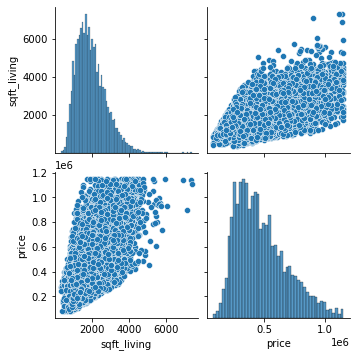

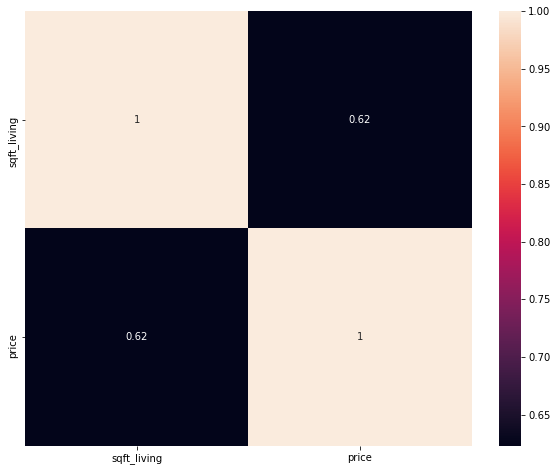

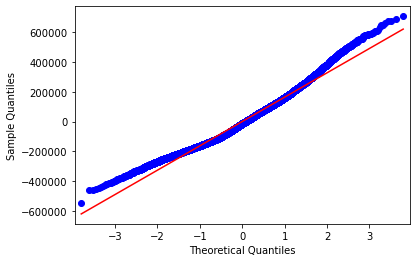

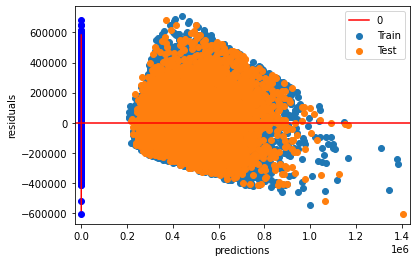

In [139]:
check_assumptions(X_train['sqft_living'], y_train, train_preds, test_preds, y_test)

## Model of bedrooms and price 

In [140]:
model = sm.OLS(y_train, sm.add_constant(X_train['bedrooms'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     1330.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.38e-278
Time:                        10:33:50   Log-Likelihood:            -1.8683e+05
No. Observations:               13704   AIC:                         3.737e+05
Df Residuals:                   13702   BIC:                         3.737e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.127e+05   4861.453     64.325      0.000    3.03e+05    3.22e+05
bedrooms     7.13e+04   1955.121     36.469      0.000    6.75e+04    7.51e+04
==============================================================================
Omnibus:                      944.930   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1153.598
Skew:                           0.709   Prob(JB):                    3.16e-251
Kurtosis:                       3.091   Cond. No.                         8.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
train_preds = model.predict(sm.add_constant(X_train['bedrooms']))
test_preds = model.predict(sm.add_constant(X_test['bedrooms']))

#### Evaluate the R2, RMSE, and MAE scores

In [184]:
evaluate(y_train, train_preds, y_test, test_preds)


Train R2: -2.4853
Test R2: -2.5160
****
Train RMSE: $394,405.24
Test RMSE: $395,755.96
****
Train MAE: $333,450.94
Test MAE: $335,199.95


### Check linear assumptions Bedrooms and Price 

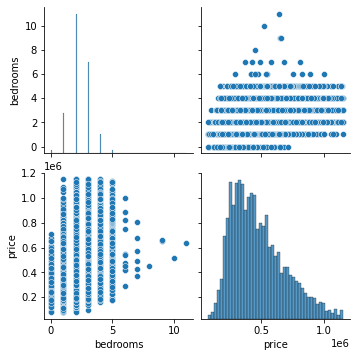

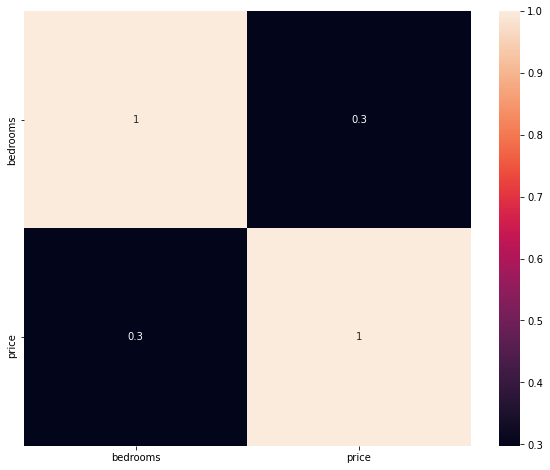

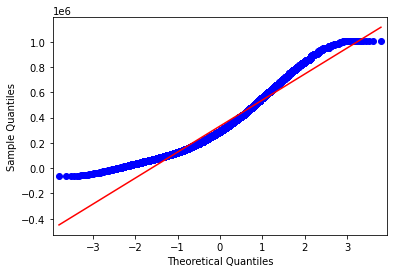

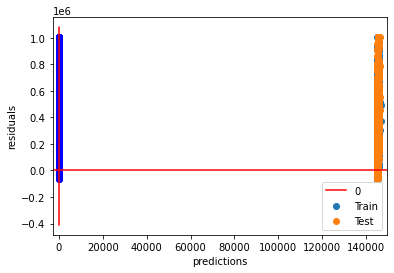

In [185]:
check_assumptions(X_train['bedrooms'], y_train, train_preds, test_preds, y_test)

## Model of bathrooms and price 

In [186]:
model = sm.OLS(y_train, sm.add_constant(X_train['bathrooms'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     3566.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:59:41   Log-Likelihood:            -1.8588e+05
No. Observations:               13704   AIC:                         3.718e+05
Df Residuals:                   13702   BIC:                         3.718e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.695e+05   3850.951     69.989      0.000    2.62e+05    2.77e+05
bathrooms   3.367e+04    563.799     59.717      0.000    3.26e+04    3.48e+04
==============================================================================
Omnibus:                      902.292   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1089.162
Skew:                           0.685   Prob(JB):                    3.10e-237
Kurtosis:                       3.178   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
train_preds = model.predict(sm.add_constant(X_train['bathrooms']))
test_preds = model.predict(sm.add_constant(X_test['bathrooms']))

#### Evaluate the R2, RMSE, and MAE scores

In [188]:
evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.2065
Test R2: 0.2232
****
Train RMSE: $188,189.42
Test RMSE: $186,020.45
****
Train MAE: $151,233.08
Test MAE: $149,312.05


### Check linear assumptions bathrooms and Price 

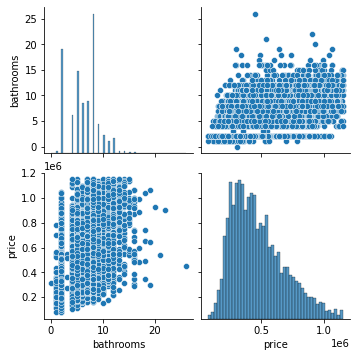

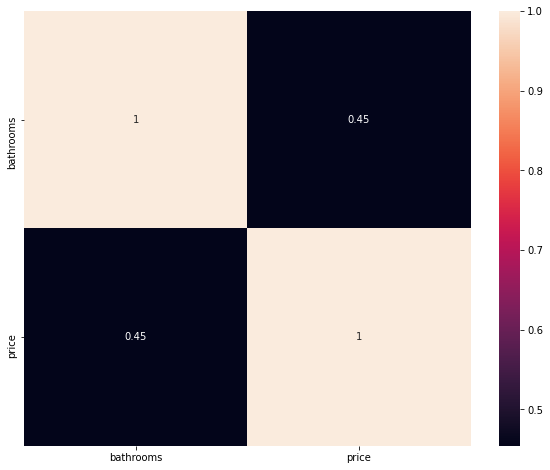

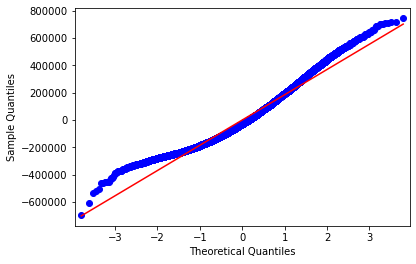

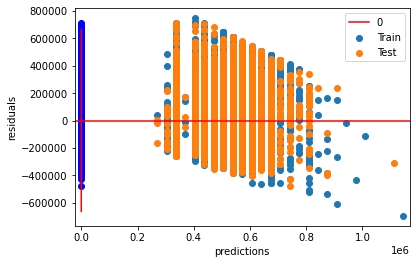

In [145]:
check_assumptions(X_train['bathrooms'], y_train, train_preds, test_preds, y_test)

## Model of bedrooms and bathrooms and price 

In [189]:
model = sm.OLS(y_train, sm.add_constant(X_train[['bedrooms', 'bathrooms']])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     1854.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:02:13   Log-Likelihood:            -1.8583e+05
No. Observations:               13704   AIC:                         3.717e+05
Df Residuals:                   13701   BIC:                         3.717e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.391e+05   4785.862     49.967      0.000     2.3e+05    2.49e+05
bedrooms    2.229e+04   2099.683     10.617      0.000    1.82e+04    2.64e+04
bathrooms   3.021e+04    648.961     46.558      0.000    2.89e+04    3.15e+04
==============================================================================
Omnibus:                      864.162   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1035.078
Skew:                           0.668   Prob(JB):                    1.72e-225
Kurtosis:                       3.171   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
train_preds = model.predict(sm.add_constant(X_train[['bedrooms','bathrooms']]))
test_preds = model.predict(sm.add_constant(X_test[['bedrooms','bathrooms']]))

#### Evaluate the R2, RMSE, and MAE scores

In [192]:
evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.2130
Test R2: 0.2312
****
Train RMSE: $187,420.06
Test RMSE: $185,060.99
****
Train MAE: $150,729.98
Test MAE: $148,546.50


### Check linear assumptions bedrooms/bathrooms and Price 

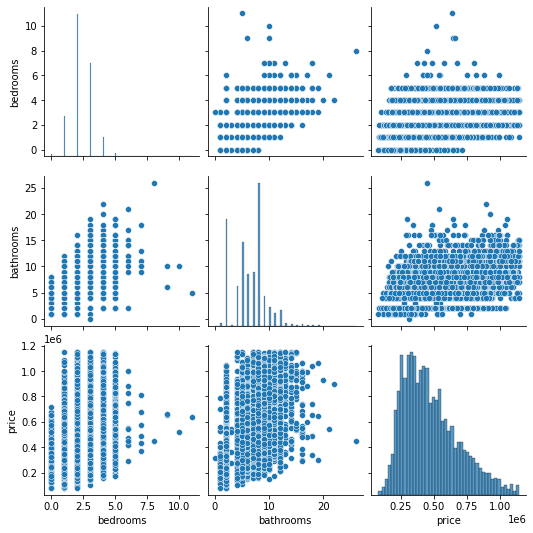

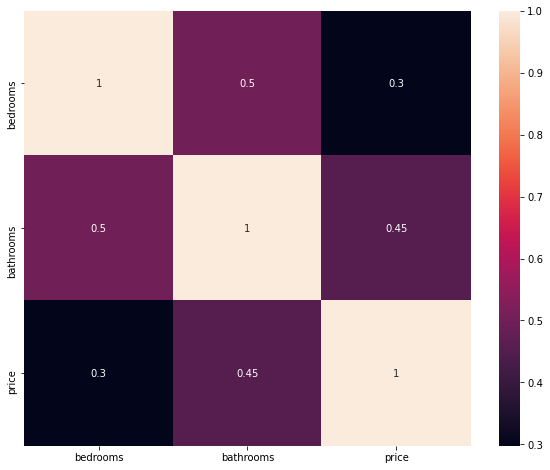

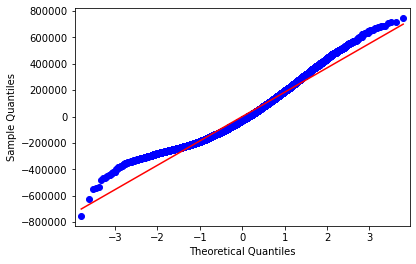

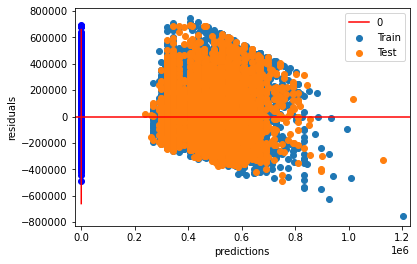

In [193]:
check_assumptions(X_train[['bedrooms', 'bathrooms']], y_train, train_preds, test_preds, y_test)

## Model of bathroom/sqft_living and price 

In [194]:
model = sm.OLS(y_train, sm.add_constant(X_train[['sqft_living', 'bathrooms']])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     4346.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:04:55   Log-Likelihood:            -1.8410e+05
No. Observations:               13704   AIC:                         3.682e+05
Df Residuals:                   13701   BIC:                         3.682e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.435e+05   3916.423     36.647      0.000    1.36e+05    1.51e+05
sqft_living   164.9900      2.587     63.780      0.000     159.919     170.061
bathrooms    1432.1894    707.511      2.024      0.043      45.371    2819.008
==============================================================================
Omnibus:                      715.126   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              833.321
Skew:                           0.581   Prob(JB):                    1.11e-181
Kurtosis:                       3.331   Cond. No.                     5.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
train_preds = model.predict(sm.add_constant(X_train[['sqft_living','bathrooms']]))
test_preds = model.predict(sm.add_constant(X_test[['sqft_living','bathrooms']]))

#### Evaluate the R2, RMSE, and MAE scores

In [197]:
evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.3882
Test R2: 0.4053
****
Train RMSE: $165,249.86
Test RMSE: $162,758.05
****
Train MAE: $132,528.24
Test MAE: $130,987.63


### Check linear assumptions bathrooms/sqft_living and Price 

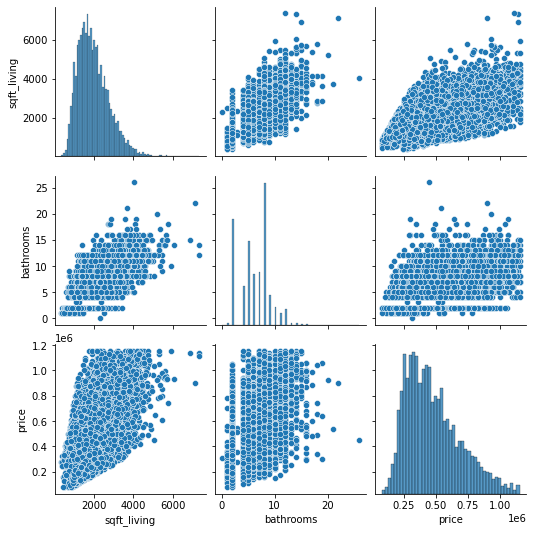

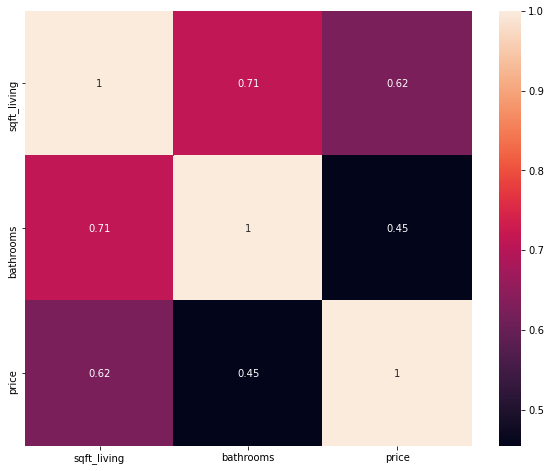

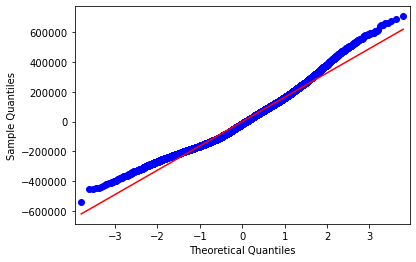

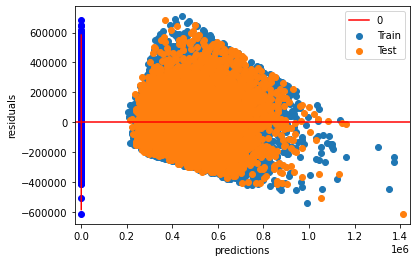

In [198]:
check_assumptions(X_train[['sqft_living', 'bathrooms']], y_train, train_preds, test_preds, y_test)